In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [34]:
print("Image Data Shape", digits.data.shape)
print("Image Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Image Data Shape (1797,)


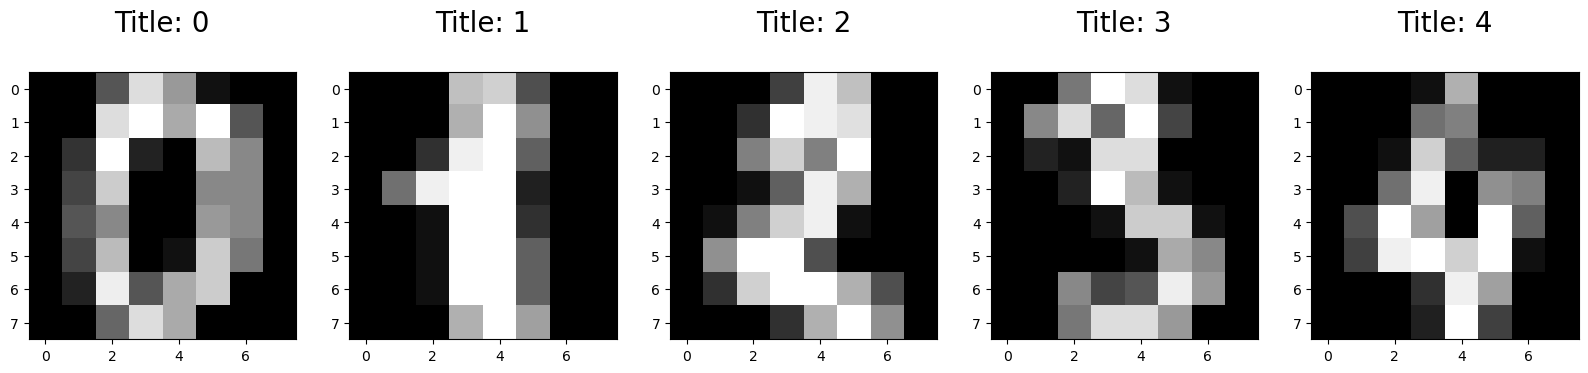

In [35]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Title: %i\n" % label, fontsize = 20)
    

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.23,
    random_state=2)

In [37]:
print(x_train.shape)

(1383, 64)


In [38]:
print(x_test.shape)

(414, 64)


In [39]:
print(y_train.shape)
print(y_test.shape)

(1383,)
(414,)


In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
## Make an instance for Logistic Regression Model
logisticRegr = LogisticRegression(max_iter=3000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [42]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [43]:
predictions = logisticRegr.predict(x_test)

In [44]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9492753623188406


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [46]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


Text(0.5, 1.0, 'Accuracy Score:0.9492753623188406')

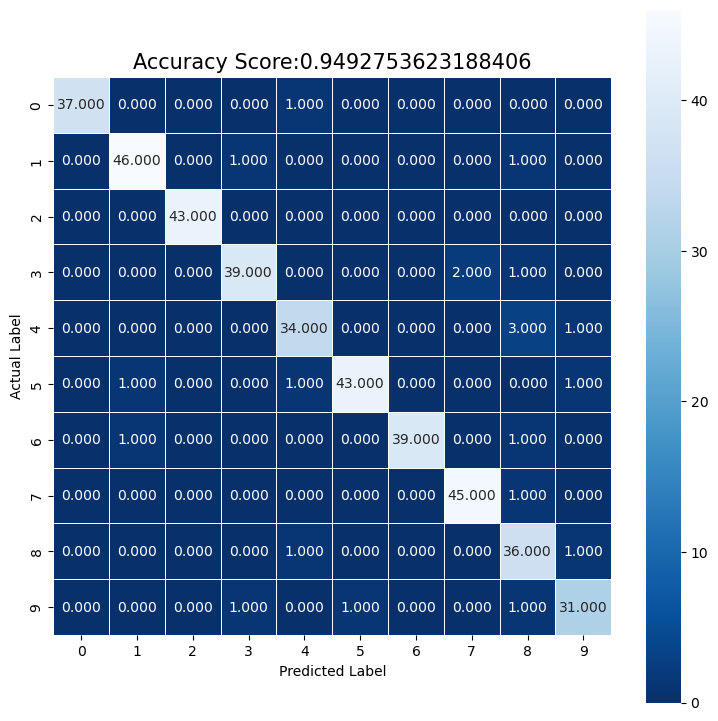

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", 
            linewidths=0.5, square=True, cmap="Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title = "Accuracy Score:{0}".format(score)
plt.title(all_sample_title, size = 15)

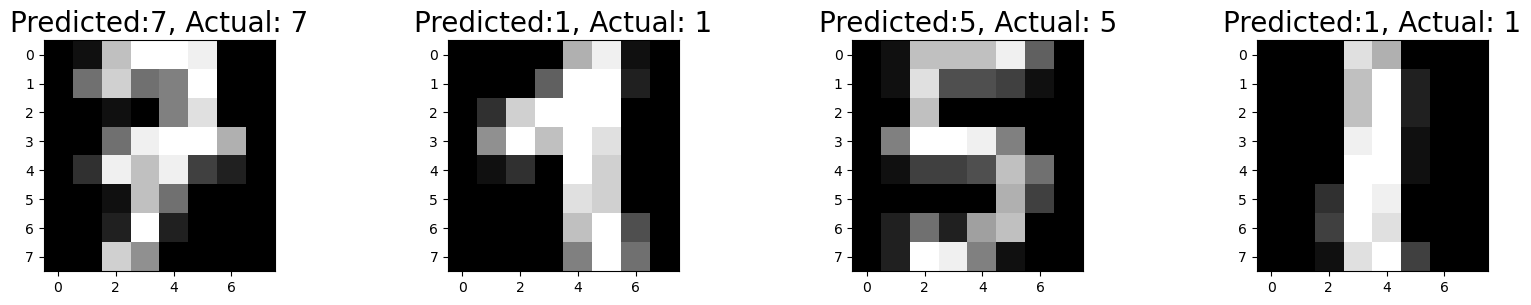

In [48]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[4:8]):
    plt.subplot(1,4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), 
               cmap=plt.cm.gray)
    plt.title("Predicted:{}, Actual: {}".format(
        predictions[wrong], y_test[wrong]), fontsize=20)